# **Complete Monthly Ridership Data Analysis**



**Data Preparation **


1.   Load the complete csv file, including monthly-updated service information reported by urban Full Reporters from 2002 to 2024.
2.   Explore the data and filter out the data we needed.
      *   Filter out larger heavy rail agencies
      *   Filter out other types of service, only include heavy rail
      *   Adjust the data format for further analysis

In [77]:
# Read the csv
import pandas as pd
df_full = pd.read_csv('Complete Monthly Ridership_full.csv')
df_full["Agency"] = df_full["Agency"].str.rstrip()
print(df_full.head())

   NTD ID Legacy NTD ID       Agency Mode/Type of Service Status  \
0     1.0          0001  King County                      Active   
1     1.0          0001  King County                      Active   
2     1.0          0001  King County                      Active   
3     1.0          0001  King County                    Inactive   
4     1.0          0001  King County                      Active   

   Reporter Type  UACE CD             UZA Name Mode TOS 3 Mode  ...  \
0  Full Reporter  80389.0  Seattle--Tacoma, WA   DR  PT    Bus  ...   
1  Full Reporter  80389.0  Seattle--Tacoma, WA   DR  TX    Bus  ...   
2  Full Reporter  80389.0  Seattle--Tacoma, WA   FB  DO  Ferry  ...   
3  Full Reporter  80389.0  Seattle--Tacoma, WA   LR  DO   Rail  ...   
4  Full Reporter  80389.0  Seattle--Tacoma, WA   MB  DO    Bus  ...   

       3/2024      4/2024      5/2024      6/2024      7/2024      8/2024  \
0     87,884      89,220      90,826      82,332      86,007      90,416    
1      9,8

In [78]:
# Filter the data for larger rail agencies
agency_filter = [
    'Massachusetts Bay Transportation Authority',
    'Port Authority Transit Corporation',
    'Port Authority Trans-Hudson Corporation',
    'Southeastern Pennsylvania Transportation Authority',
    'Washington Metropolitan Area Transit Authority',
    'Metropolitan Atlanta Rapid Transit Authority',
    'Chicago Transit Authority',
    'San Francisco Bay Area Rapid Transit District',
    'Los Angeles County Metropolitan Transportation Authority'
    ]

filtered_df = df_full[df_full['Agency'].isin(agency_filter)].reset_index(drop=True)

filtered_df.head()

,NTD ID,Legacy NTD ID,Agency,Mode/Type of Service Status,Reporter Type,UACE CD,UZA Name,Mode,TOS,3 Mode,...,3/2024,4/2024,5/2024,6/2024,7/2024,8/2024,9/2024,10/2024,11/2024,12/2024
0,10003.0,1003,Massachusetts Bay Transportation Authority,Inactive,Full Reporter,9271.0,"Boston, MA--NH",CR,DO,Rail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10003.0,1003,Massachusetts Bay Transportation Authority,Active,Full Reporter,9271.0,"Boston, MA--NH",CR,PT,Rail,...,"2,528,790","2,558,908","2,717,296","2,645,383","2,708,847","2,701,447","2,669,573","2,975,340","2,390,276","2,271,779"
2,10003.0,1003,Massachusetts Bay Transportation Authority,Active,Full Reporter,9271.0,"Boston, MA--NH",DR,PT,Bus,...,"84,618","84,773","91,653","86,436","89,564","89,972","90,178","99,360","91,543","90,742"
3,10003.0,1003,Massachusetts Bay Transportation Authority,Active,Full Reporter,9271.0,"Boston, MA--NH",FB,PT,Ferry,...,"75,290","94,055","126,341","162,140","204,938","185,238","142,024","135,033","91,942","69,754"
4,10003.0,1003,Massachusetts Bay Transportation Authority,Active,Full Reporter,9271.0,"Boston, MA--NH",HR,DO,Rail,...,"6,949,762","7,253,403","7,191,380","6,693,392","6,968,473","6,900,226","7,457,224","8,273,290","6,778,276","6,951,092"


In [79]:
# Filter out Rail service
filtered_df = filtered_df[filtered_df['3 Mode'] == 'Rail'].reset_index(drop=True)
filtered_df.head()

,NTD ID,Legacy NTD ID,Agency,Mode/Type of Service Status,Reporter Type,UACE CD,UZA Name,Mode,TOS,3 Mode,...,3/2024,4/2024,5/2024,6/2024,7/2024,8/2024,9/2024,10/2024,11/2024,12/2024
0,10003.0,1003,Massachusetts Bay Transportation Authority,Inactive,Full Reporter,9271.0,"Boston, MA--NH",CR,DO,Rail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10003.0,1003,Massachusetts Bay Transportation Authority,Active,Full Reporter,9271.0,"Boston, MA--NH",CR,PT,Rail,...,"2,528,790","2,558,908","2,717,296","2,645,383","2,708,847","2,701,447","2,669,573","2,975,340","2,390,276","2,271,779"
2,10003.0,1003,Massachusetts Bay Transportation Authority,Active,Full Reporter,9271.0,"Boston, MA--NH",HR,DO,Rail,...,"6,949,762","7,253,403","7,191,380","6,693,392","6,968,473","6,900,226","7,457,224","8,273,290","6,778,276","6,951,092"
3,10003.0,1003,Massachusetts Bay Transportation Authority,Active,Full Reporter,9271.0,"Boston, MA--NH",LR,DO,Rail,...,"2,921,855","3,503,450","3,437,242","3,407,784","2,654,843","2,802,272","3,204,893","3,447,899","2,774,770","2,282,374"
4,20075.0,2075,Port Authority Transit Corporation,Active,Full Reporter,69076.0,"Philadelphia, PA--NJ--DE--MD",HR,DO,Rail,...,"469,812","481,510","485,183","453,926","468,374","465,525","473,021","538,581","459,370","456,910"


In [80]:
# Filter out the heavy rail
filtered_df = filtered_df[filtered_df['Mode'] == 'HR'].reset_index(drop=True)
filtered_df.head()

,NTD ID,Legacy NTD ID,Agency,Mode/Type of Service Status,Reporter Type,UACE CD,UZA Name,Mode,TOS,3 Mode,...,3/2024,4/2024,5/2024,6/2024,7/2024,8/2024,9/2024,10/2024,11/2024,12/2024
0,10003.0,1003,Massachusetts Bay Transportation Authority,Active,Full Reporter,9271.0,"Boston, MA--NH",HR,DO,Rail,...,"6,949,762","7,253,403","7,191,380","6,693,392","6,968,473","6,900,226","7,457,224","8,273,290","6,778,276","6,951,092"
1,20075.0,2075,Port Authority Transit Corporation,Active,Full Reporter,69076.0,"Philadelphia, PA--NJ--DE--MD",HR,DO,Rail,...,"469,812","481,510","485,183","453,926","468,374","465,525","473,021","538,581","459,370","456,910"
2,20098.0,2098,Port Authority Trans-Hudson Corporation,Active,Full Reporter,63217.0,"New York--Jersey City--Newark, NY--NJ",HR,DO,Rail,...,"4,937,249","5,178,549","5,518,949","5,219,749","5,331,101","5,096,990","5,591,886","6,197,869","5,264,703","5,237,521"
3,30019.0,3019,Southeastern Pennsylvania Transportation Autho...,Active,Full Reporter,69076.0,"Philadelphia, PA--NJ--DE--MD",HR,DO,Rail,...,"4,589,803","5,207,239","5,154,063","4,669,490","4,812,543","5,305,385","5,546,627","6,010,661","5,254,957","4,826,300"
4,30030.0,3030,Washington Metropolitan Area Transit Authority,Active,Full Reporter,92242.0,"Washington--Arlington, DC--VA--MD",HR,DO,Rail,...,"13,932,370","14,049,740","13,789,248","13,311,517","13,307,839","12,618,092","14,245,971","15,956,288","12,851,728","12,376,944"


In [81]:
# Drop the columns we don't need
filtered_df = filtered_df.drop(columns=['NTD ID', 'Legacy NTD ID', 'Reporter Type',
                                        'UACE CD', 'UZA Name', 'TOS', 'Mode/Type of Service Status',	'Mode',	'3 Mode'])
filtered_df

,Agency,1/2002,2/2002,3/2002,4/2002,5/2002,6/2002,7/2002,8/2002,9/2002,...,3/2024,4/2024,5/2024,6/2024,7/2024,8/2024,9/2024,10/2024,11/2024,12/2024
0,Massachusetts Bay Transportation Authority,"9,952,800","9,753,800","10,469,800","10,736,100","10,526,600","10,366,500","10,964,600","10,665,500","10,613,800",...,"6,949,762","7,253,403","7,191,380","6,693,392","6,968,473","6,900,226","7,457,224","8,273,290","6,778,276","6,951,092"
1,Port Authority Transit Corporation,"852,644","763,546","817,218","824,015","802,937","734,531","768,671","748,081","736,845",...,"469,812","481,510","485,183","453,926","468,374","465,525","473,021","538,581","459,370","456,910"
2,Port Authority Trans-Hudson Corporation,"4,479,200","4,058,400","4,464,500","4,601,800","4,520,800","4,269,700","4,352,400","4,356,900","4,262,900",...,"4,937,249","5,178,549","5,518,949","5,219,749","5,331,101","5,096,990","5,591,886","6,197,869","5,264,703","5,237,521"
3,Southeastern Pennsylvania Transportation Autho...,"6,445,968","6,871,511","8,451,948","6,909,404","8,210,590","6,483,615","6,184,994","7,625,424","6,707,166",...,"4,589,803","5,207,239","5,154,063","4,669,490","4,812,543","5,305,385","5,546,627","6,010,661","5,254,957","4,826,300"
4,Washington Metropolitan Area Transit Authority,"19,049,385","17,981,556","20,707,901","22,095,957","21,237,523","21,295,417","22,617,116","20,883,018","19,810,404",...,"13,932,370","14,049,740","13,789,248","13,311,517","13,307,839","12,618,092","14,245,971","15,956,288","12,851,728","12,376,944"
5,Metropolitan Atlanta Rapid Transit Authority,"6,767,476","6,231,858","6,672,222","6,626,629","7,014,024","6,338,135","6,707,662","6,764,336","6,208,143",...,"2,618,192","2,395,093","2,488,926","2,459,291","2,490,496","2,532,262","2,467,345","2,755,961","2,303,963","2,216,251"
6,Chicago Transit Authority,"14,624,269","13,669,974","14,473,891","15,225,270","15,412,404","15,104,664","15,910,673","15,487,423","15,536,808",...,"10,107,439","10,458,339","11,330,441","10,928,671","11,279,758","11,744,693","11,665,977","12,630,875","10,312,595","9,152,319"
7,San Francisco Bay Area Rapid Transit District,"7,909,547","7,345,194","7,964,285","8,270,355","8,289,133","7,763,741","8,115,480","8,102,483","7,967,666",...,"4,479,626","4,538,901","4,767,259","4,421,768","4,516,085","4,811,857","4,927,208","5,178,577","4,232,310","4,154,021"
8,Los Angeles County Metropolitan Transportation...,"3,567,990","3,167,256","3,367,433","3,558,246","3,558,884","3,313,175","2,761,053","2,686,077","2,604,972",...,"1,874,721","1,855,856","1,869,086","1,868,890","1,898,643","1,907,192","1,895,970","2,013,539","1,911,000","1,877,731"


In [82]:
# Adjust the format
df_long = filtered_df.melt(id_vars=['Agency'],
                  var_name='date',
                  value_name='ridership')
df_long

,Agency,date,ridership
0,Massachusetts Bay Transportation Authority,1/2002,"9,952,800"
1,Port Authority Transit Corporation,1/2002,"852,644"
2,Port Authority Trans-Hudson Corporation,1/2002,"4,479,200"
3,Southeastern Pennsylvania Transportation Autho...,1/2002,"6,445,968"
4,Washington Metropolitan Area Transit Authority,1/2002,"19,049,385"
...,...,...,...
2479,Washington Metropolitan Area Transit Authority,12/2024,"12,376,944"
2480,Metropolitan Atlanta Rapid Transit Authority,12/2024,"2,216,251"
2481,Chicago Transit Authority,12/2024,"9,152,319"
2482,San Francisco Bay Area Rapid Transit District,12/2024,"4,154,021"


In [83]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Agency     2484 non-null   object
 1   date       2484 non-null   object
 2   ridership  2484 non-null   object
dtypes: object(3)
memory usage: 58.3+ KB


**Data Analysis**

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime objects
df_long['date'] = pd.to_datetime(df_long['date'])
df_long['ridership'] = pd.to_numeric(df_long['ridership'].str.replace(',', ''), errors='coerce')

<ipython-input-84-cf120c29b761>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long['date'] = pd.to_datetime(df_long['date'])


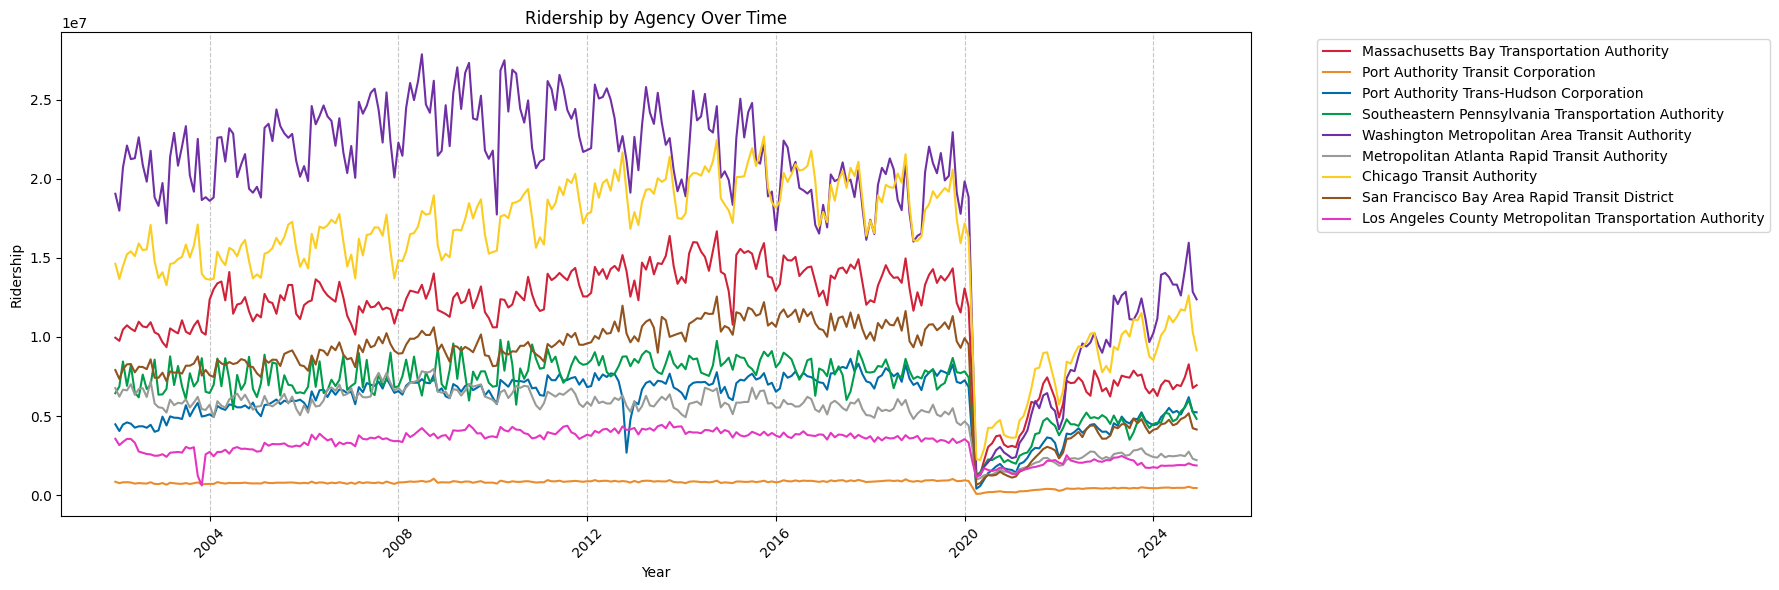

In [110]:
# Set the color palette for each agency
agency_palette = {
    'Massachusetts Bay Transportation Authority': '#D02239',
    'Port Authority Transit Corporation': '#EA8C2D',
    'Port Authority Trans-Hudson Corporation': '#006CA9',
    'Southeastern Pennsylvania Transportation Authority': '#009D4A',
    'Washington Metropolitan Area Transit Authority': '#6F30A5',
    'Metropolitan Atlanta Rapid Transit Authority': '#989B96',
    'Chicago Transit Authority': '#FBCD21',
    'San Francisco Bay Area Rapid Transit District': '#92541F',
    'Los Angeles County Metropolitan Transportation Authority': '#E436C1'
}

# Create the linechart of ridership from 2002 to 2024
plt.figure(figsize=(18, 6))
sns.lineplot(x='date', y='ridership', hue='Agency', data=df_long, palette=agency_palette)
plt.title('Ridership by Agency Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.xlabel('Year')
plt.ylabel('Ridership')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

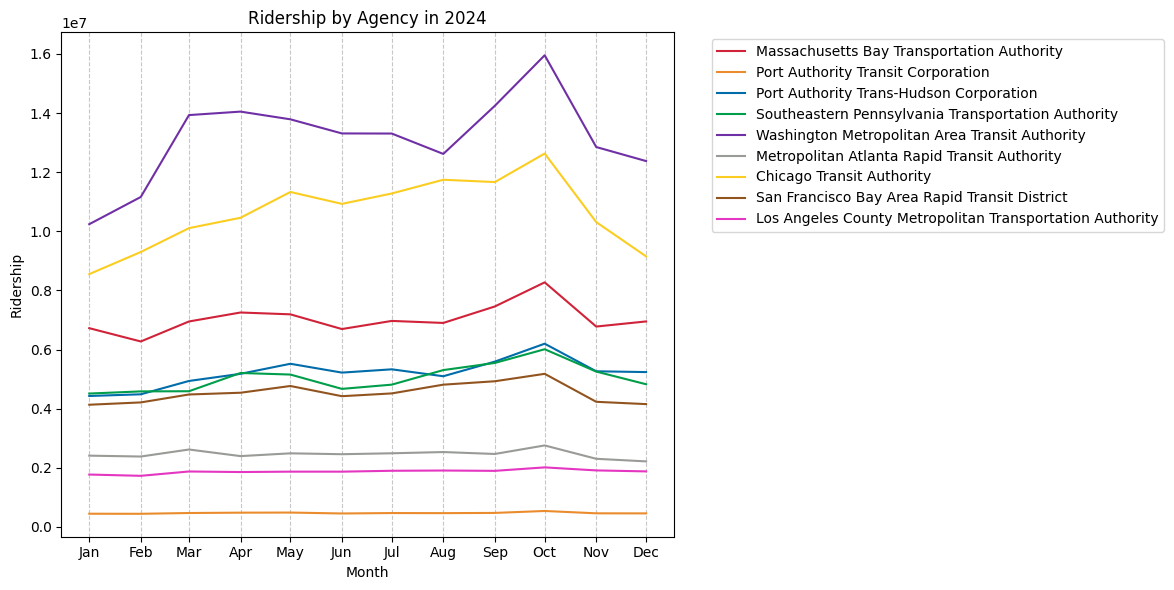

In [86]:
# Filter data for the year 2024
df_2024 = df_long[df_long['date'].dt.year == 2024]

# Create the line chart for 2024
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='ridership', hue='Agency', data=df_2024, palette=agency_palette)
plt.title('Ridership by Agency in 2024')
plt.xlabel('Month')
plt.ylabel('Ridership')

# Set x-axis ticks to show all 12 months
plt.xticks(pd.date_range('2024-01-01', periods=12, freq='MS'),
           [month.strftime('%b') for month in pd.date_range('2024-01-01', periods=12, freq='MS')])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

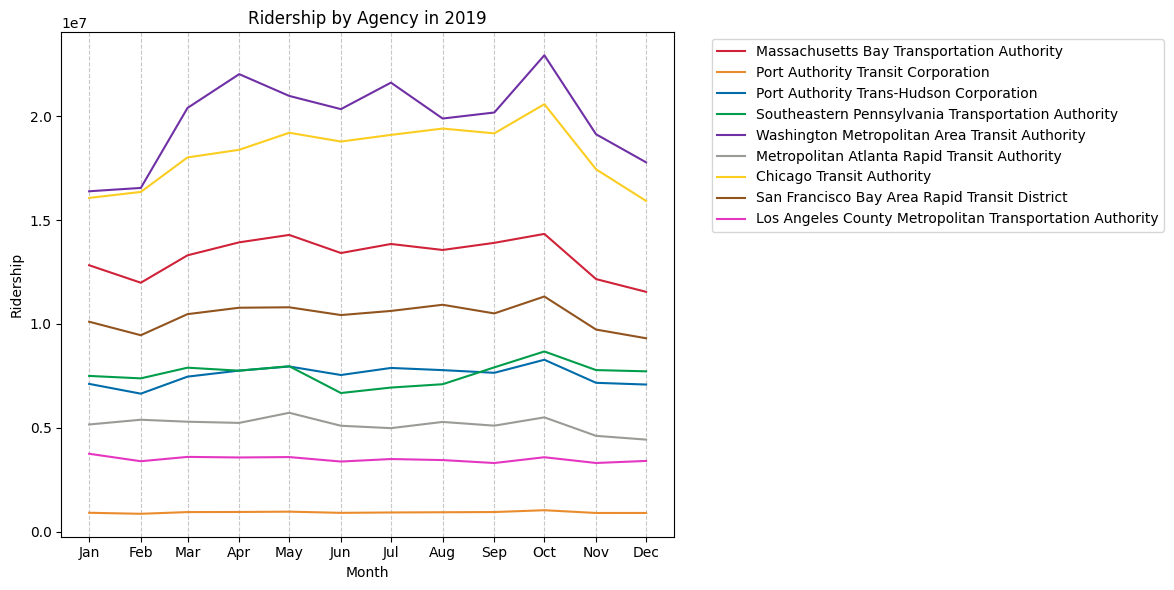

In [87]:
# Filter data for the year 2019
df_2019 = df_long[df_long['date'].dt.year == 2019]

# Create the line chart for 2024
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='ridership', hue='Agency', data=df_2019, palette=agency_palette)
plt.title('Ridership by Agency in 2019')
plt.xlabel('Month')
plt.ylabel('Ridership')

# Set x-axis ticks to show all 12 months
plt.xticks(pd.date_range('2019-01-01', periods=12, freq='MS'),
           [month.strftime('%b') for month in pd.date_range('2019-01-01', periods=12, freq='MS')])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

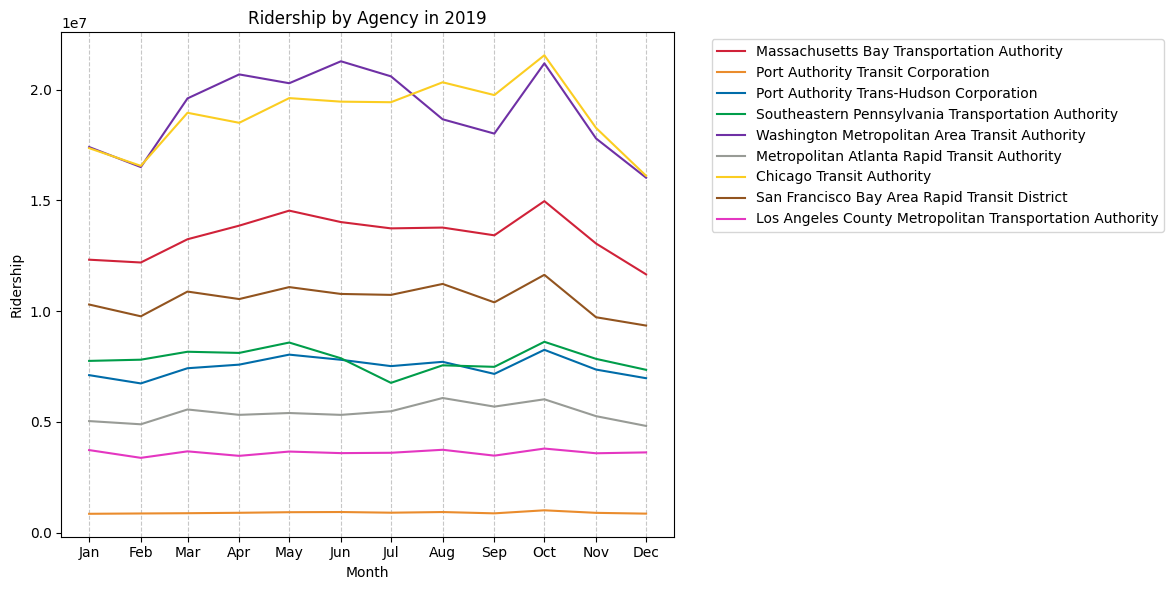

In [88]:
# Filter data for the year 2018
df_2018 = df_long[df_long['date'].dt.year == 2018]

# Create the line chart for 2018
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='ridership', hue='Agency', data=df_2018, palette=agency_palette)
plt.title('Ridership by Agency in 2019')
plt.xlabel('Month')
plt.ylabel('Ridership')

# Set x-axis ticks to show all 12 months
plt.xticks(pd.date_range('2018-01-01', periods=12, freq='MS'),
           [month.strftime('%b') for month in pd.date_range('2019-01-01', periods=12, freq='MS')])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The line chart indicates that the ridership dropped in 2020 because the pandemic.\
Therefore we decided to take a closer look of the ridership after pandemic.

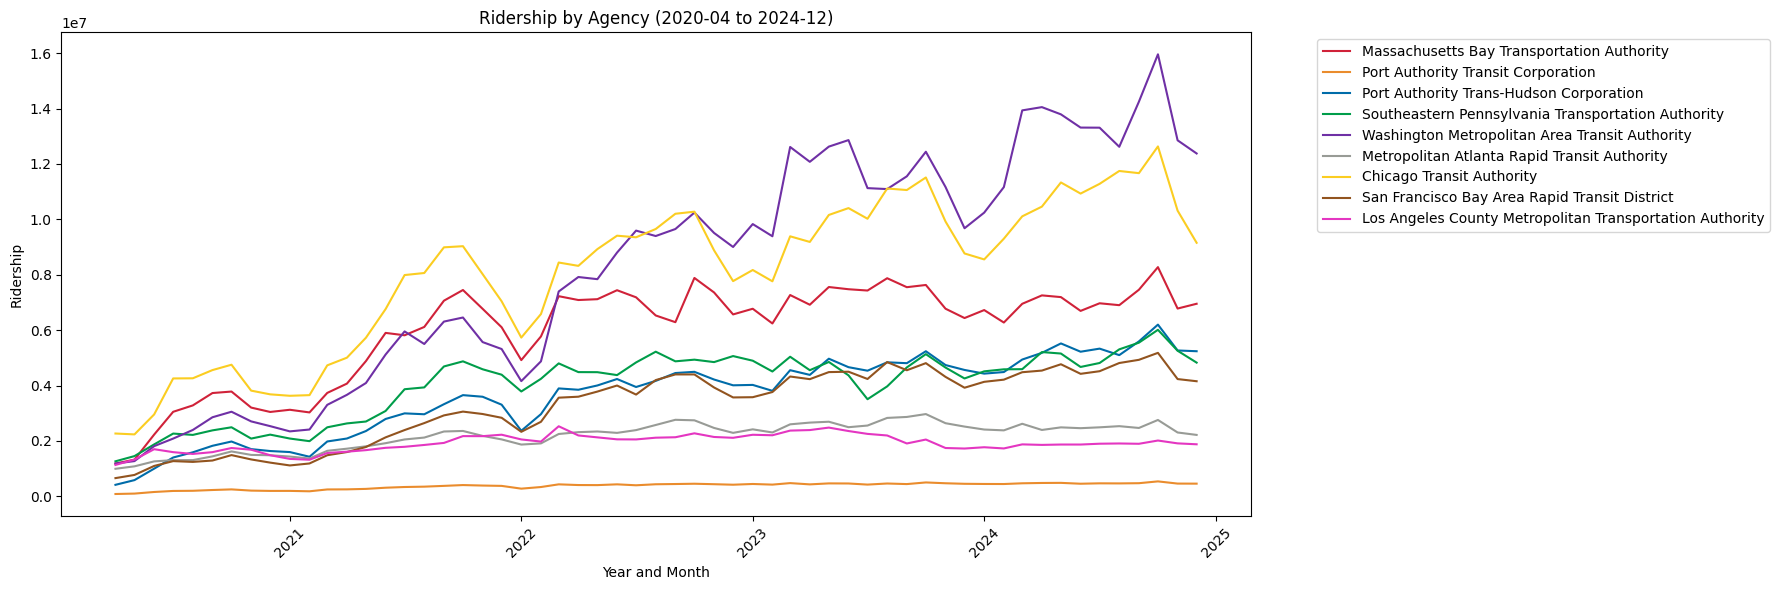

In [89]:
# Filter data for the post-covid19 (2020/04 ~ 2024/12)
df_filtered = df_long[(df_long['date'] >= '2020-04-01')]

# Create a linechart of ridership post-covid19
plt.figure(figsize=(18, 6))
sns.lineplot(x='date', y='ridership', hue='Agency', data=df_filtered, palette=agency_palette)
plt.title('Ridership by Agency (2020-04 to 2024-12)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year and Month')
plt.ylabel('Ridership')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After plotting the ridership, let's calculate the month-over-month rate to see if there is any pattern.

In [90]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 1971 to 2483
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Agency     513 non-null    object        
 1   date       513 non-null    datetime64[ns]
 2   ridership  513 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 16.0+ KB


In [91]:
# Create a new column "mom_rate"
df_filtered['ridership'] = pd.to_numeric(df_filtered['ridership'], errors='coerce')
df_filtered = df_filtered.sort_values(['Agency', 'date'])
df_filtered['mom_rate'] = df_filtered.groupby('Agency')['ridership'].pct_change()
df_filtered.fillna(0, inplace=True)
df_filtered.head()

<ipython-input-91-d8b762d61602>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ridership'] = pd.to_numeric(df_filtered['ridership'], errors='coerce')


,Agency,date,ridership,mom_rate
1977,Chicago Transit Authority,2020-04-01,2266610,0.000000
1986,Chicago Transit Authority,2020-05-01,2235078,-0.013912
1995,Chicago Transit Authority,2020-06-01,2955135,0.322162
2004,Chicago Transit Authority,2020-07-01,4255061,0.439887
2013,Chicago Transit Authority,2020-08-01,4260558,0.001292


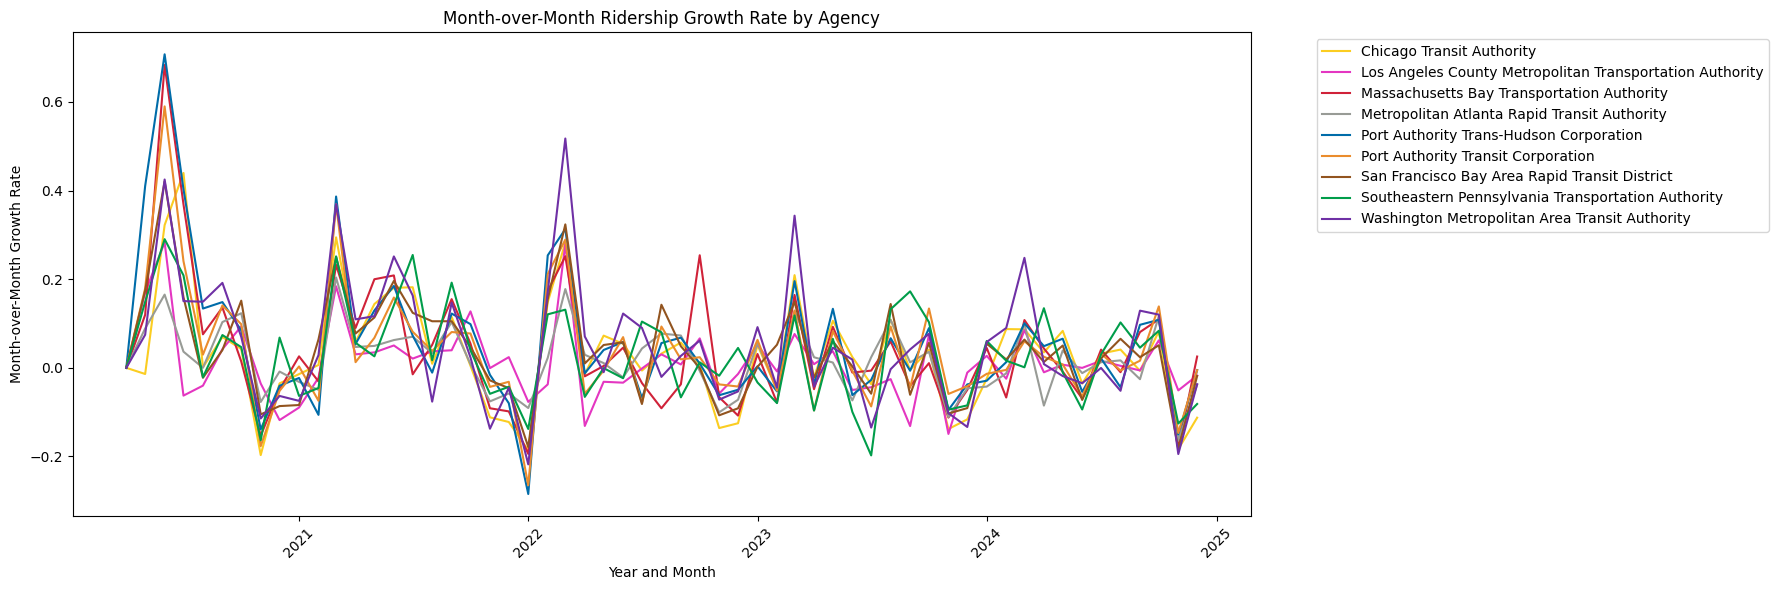

In [92]:
# Create a linchart of mom rate
plt.figure(figsize=(18, 6))
sns.lineplot(x='date', y='mom_rate', hue='Agency', data=df_filtered, palette=agency_palette)
plt.title('Month-over-Month Ridership Growth Rate by Agency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year and Month')
plt.ylabel('Month-over-Month Growth Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

To avoid the effect of outliers, let's standardize the mom_rate.

                                              Agency       date  ridership  \
1977                       Chicago Transit Authority 2020-04-01    2266610   
1986                       Chicago Transit Authority 2020-05-01    2235078   
1995                       Chicago Transit Authority 2020-06-01    2955135   
2004                       Chicago Transit Authority 2020-07-01    4255061   
2013                       Chicago Transit Authority 2020-08-01    4260558   
...                                              ...        ...        ...   
2443  Washington Metropolitan Area Transit Authority 2024-08-01   12618092   
2452  Washington Metropolitan Area Transit Authority 2024-09-01   14245971   
2461  Washington Metropolitan Area Transit Authority 2024-10-01   15956288   
2470  Washington Metropolitan Area Transit Authority 2024-11-01   12851728   
2479  Washington Metropolitan Area Transit Authority 2024-12-01   12376944   

      mom_rate    zscore  
1977  0.000000 -0.255445  
1986 -0.0

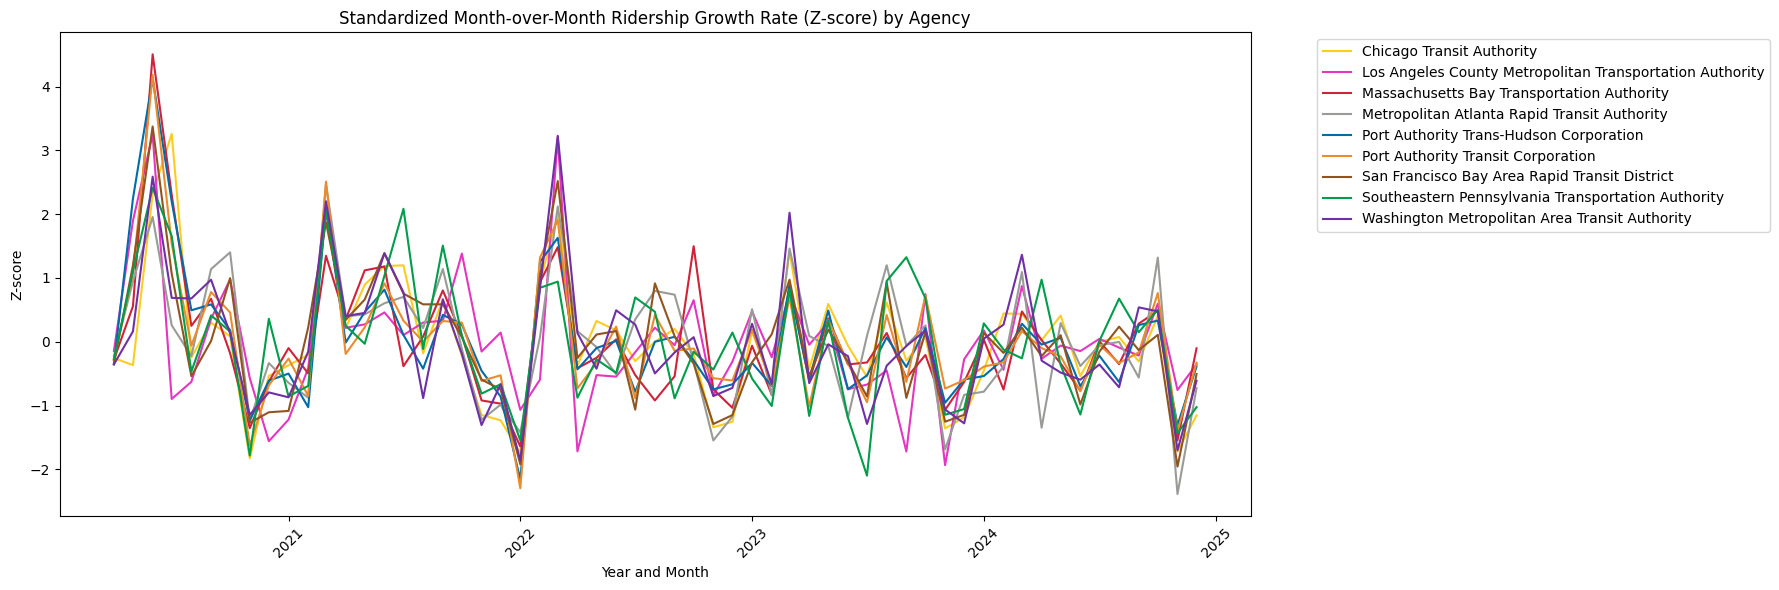

In [93]:
# Calculate the mean and standard deviation of the mom_rate for each agency
agency_stats = df_filtered.groupby('Agency')['mom_rate'].agg(['mean', 'std'])

# Function to calculate z-score
def calculate_zscore(x, mean, std):
    return (x - mean) / std

# Apply the function to calculate z-scores for each agency
for agency in df_filtered['Agency'].unique():
    mean = agency_stats.loc[agency, 'mean']
    std = agency_stats.loc[agency, 'std']
    df_filtered.loc[df_filtered['Agency'] == agency, 'zscore'] = df_filtered.loc[df_filtered['Agency'] == agency, 'mom_rate'].apply(lambda x: calculate_zscore(x, mean, std))

# Display the DataFrame with z-scores
print(df_filtered)

# Plotting the z-scores
plt.figure(figsize=(18, 6))
sns.lineplot(x='date', y='zscore', hue='Agency', data=df_filtered, palette=agency_palette)
plt.title('Standardized Month-over-Month Ridership Growth Rate (Z-score) by Agency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year and Month')
plt.ylabel('Z-score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It seems like the month-over-month rate doesn't have a clear pattern, we can see the different recovery rate.

In [94]:
# Define a function to calculate the average ridership for different periods
def calculate_average_ridership(df, agency, end_date, years):
    start_date = end_date - pd.DateOffset(years=years)
    average_ridership = df[(df['Agency'] == agency) & (df['date'] >= start_date) & (df['date'] <= end_date)]['ridership'].mean()
    return average_ridership

# Create an empty list to store the recovery rate data
recovery_rates = []

# Iterate through each agency
for agency in df_long['Agency'].unique():
    # Calculate the average ridership for the periods before 2020-04-01
    avg_ridership_1yr = calculate_average_ridership(df_long, agency, pd.to_datetime('2020-03-01'), 1)
    avg_ridership_3yr = calculate_average_ridership(df_long, agency, pd.to_datetime('2020-03-01'), 3)
    avg_ridership_5yr = calculate_average_ridership(df_long, agency, pd.to_datetime('2020-03-01'), 5)

    # Calculate the average ridership after 2024-01-01 for each agency
    post_pandemic_avg = df_long[(df_long['Agency'] == agency) & (df_long['date'] >= '2024-01-01')]['ridership'].mean()


    # Calculate the recovery rates for different averaging periods
    recovery_rate_1yr = (post_pandemic_avg / avg_ridership_1yr) if avg_ridership_1yr !=0 else 0
    recovery_rate_3yr = (post_pandemic_avg / avg_ridership_3yr) if avg_ridership_3yr !=0 else 0
    recovery_rate_5yr = (post_pandemic_avg / avg_ridership_5yr) if avg_ridership_5yr !=0 else 0

    # Append the results to the list
    recovery_rates.append([agency, recovery_rate_1yr, recovery_rate_3yr, recovery_rate_5yr])

# Create a DataFrame from the recovery rate data
recovery_df = pd.DataFrame(recovery_rates, columns=['Agency', 'Recovery_Rate_1yr', 'Recovery_Rate_3yr', 'Recovery_Rate_5yr'])

# Display the DataFrame
recovery_df

,Agency,Recovery_Rate_1yr,Recovery_Rate_3yr,Recovery_Rate_5yr
0,Massachusetts Bay Transportation Authority,0.551272,0.530006,0.513931
1,Port Authority Transit Corporation,0.522747,0.521570,0.527677
2,Port Authority Trans-Hudson Corporation,0.719794,0.696496,0.702666
3,Southeastern Pennsylvania Transportation Autho...,0.677132,0.658377,0.638525
4,Washington Metropolitan Area Transit Authority,0.673126,0.685848,0.669110
5,Metropolitan Atlanta Rapid Transit Authority,0.505157,0.465985,0.446613
6,Chicago Transit Authority,0.602163,0.575688,0.557143
7,San Francisco Bay Area Rapid Transit District,0.457840,0.437096,0.422929
8,Los Angeles County Metropolitan Transportation...,0.557937,0.526549,0.511690


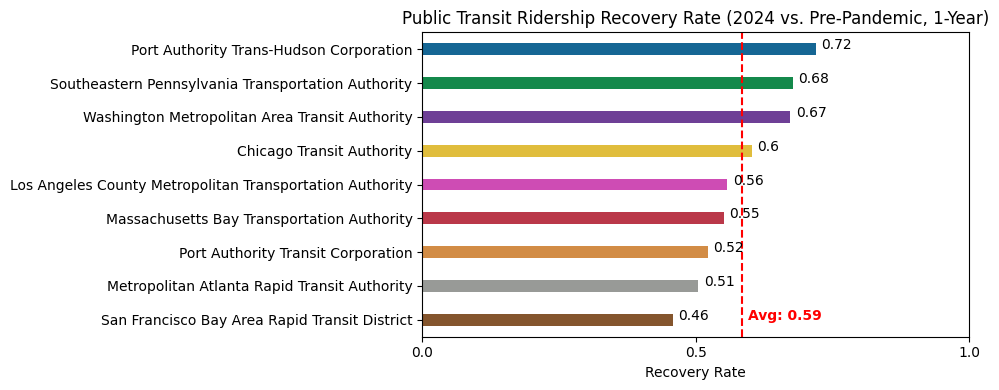

In [102]:
# Sort the DataFrame by Recovery_Rate_1yr in descending order
recovery_1yr_df_sorted = recovery_df.sort_values('Recovery_Rate_1yr', ascending=False)
avg_recovery_rate = recovery_1yr_df_sorted['Recovery_Rate_1yr'].mean()

# Create the bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Recovery_Rate_1yr', y='Agency',
            data=recovery_1yr_df_sorted,
            hue='Agency',
            dodge=False,
            palette=agency_palette,
            orient='h',
            width=0.35)

plt.title('Public Transit Ridership Recovery Rate (2024 vs. Pre-Pandemic, 1-Year)')
plt.xlabel('Recovery Rate')
plt.ylabel('')

for i, v in enumerate(recovery_1yr_df_sorted['Recovery_Rate_1yr']):
    plt.text(v + 0.01, i, str(round(v, 2)), color='black')

plt.xticks([0.0, 0.5, 1.0])
plt.axvline(avg_recovery_rate, color='red', linestyle='--', label=f'Avg: {avg_recovery_rate:.2f}')
plt.text(avg_recovery_rate + 0.01, len(recovery_1yr_df_sorted) - 1, f'Avg: {avg_recovery_rate:.2f}', color='red', fontsize=10, fontweight='bold')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

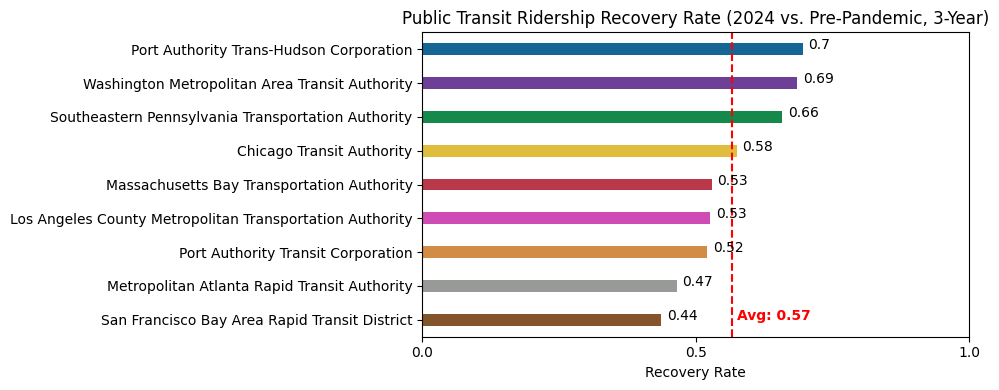

In [104]:
# Sort the DataFrame by Recovery_Rate_3yr in descending order
recovery_3yr_df_sorted = recovery_df.sort_values('Recovery_Rate_3yr', ascending=False)
avg_recovery_rate = recovery_3yr_df_sorted['Recovery_Rate_3yr'].mean()

# Create the bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Recovery_Rate_3yr', y='Agency',
            data=recovery_3yr_df_sorted,
            hue='Agency',
            dodge=False,
            palette=agency_palette,
            orient='h',
            width=0.35)

plt.title('Public Transit Ridership Recovery Rate (2024 vs. Pre-Pandemic, 3-Year)')
plt.xlabel('Recovery Rate')
plt.ylabel('')

for i, v in enumerate(recovery_3yr_df_sorted['Recovery_Rate_3yr']):
    plt.text(v + 0.01, i, str(round(v, 2)), color='black')

plt.xticks([0.0, 0.5, 1.0])
plt.axvline(avg_recovery_rate, color='red', linestyle='--', label=f'Avg: {avg_recovery_rate:.2f}')
plt.text(avg_recovery_rate + 0.01, len(recovery_3yr_df_sorted) - 1, f'Avg: {avg_recovery_rate:.2f}', color='red', fontsize=10, fontweight='bold')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

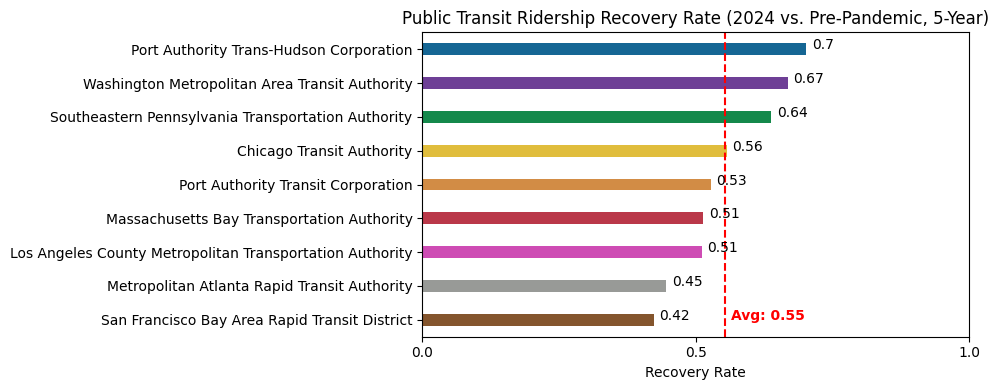

In [105]:
# Sort the DataFrame by Recovery_Rate_5yr in descending order
recovery_5yr_df_sorted = recovery_df.sort_values('Recovery_Rate_5yr', ascending=False)
avg_recovery_rate = recovery_5yr_df_sorted['Recovery_Rate_5yr'].mean()

# Create the bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Recovery_Rate_5yr', y='Agency',
            data=recovery_5yr_df_sorted,
            hue='Agency',
            dodge=False,
            palette=agency_palette,
            orient='h',
            width=0.35)

plt.title('Public Transit Ridership Recovery Rate (2024 vs. Pre-Pandemic, 5-Year)')
plt.xlabel('Recovery Rate')
plt.ylabel('')

for i, v in enumerate(recovery_5yr_df_sorted['Recovery_Rate_5yr']):
    plt.text(v + 0.01, i, str(round(v, 2)), color='black')

plt.xticks([0.0, 0.5, 1.0])
plt.axvline(avg_recovery_rate, color='red', linestyle='--', label=f'Avg: {avg_recovery_rate:.2f}')
plt.text(avg_recovery_rate + 0.01, len(recovery_3yr_df_sorted) - 1, f'Avg: {avg_recovery_rate:.2f}', color='red', fontsize=10, fontweight='bold')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()